### Basic imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from IPython.display import SVG

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [ ]:
classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
#summarize loaded dataset
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 28
Fashion MNIST test -  rows: 10000  columns: 28


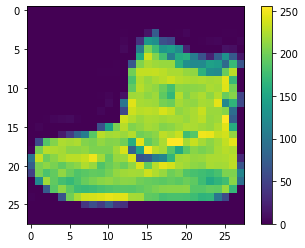

In [ ]:
#pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show() 

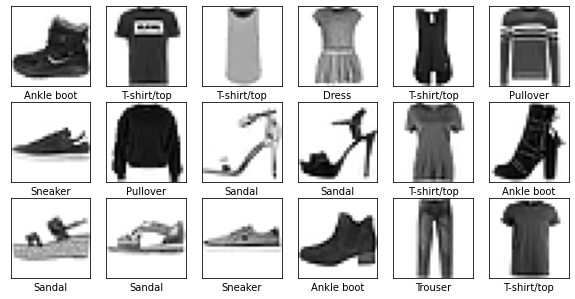

In [ ]:
#plot first few images
plt.figure(figsize=(10,5))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Text(0.5, 0, 'LABEL')

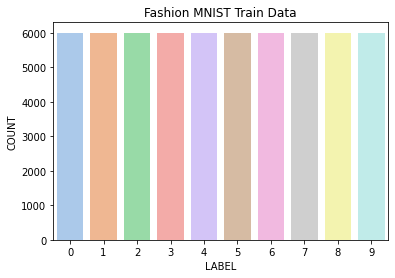

In [ ]:
sns.set_palette("pastel") #checking for balanced train data
sns.countplot(y_train)
plt.title('Fashion MNIST Train Data')
plt.ylabel('COUNT')
plt.xlabel('LABEL')

Text(0.5, 0, 'LABEL')

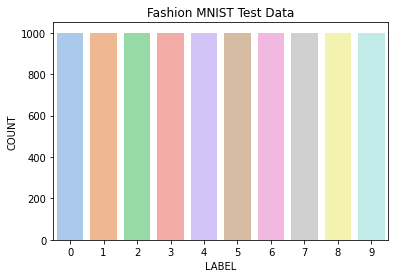

In [ ]:
sns.countplot(y_test) #checking for balanced test data
plt.title('Fashion MNIST Test Data')
plt.ylabel('COUNT')
plt.xlabel('LABEL')

### Data Preprocessing

In [ ]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalising the data
X_train /= 255 
X_test /= 255 


#convert to one-hot-encoding
Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

#reshaping the image in 3 dimensions
X_train_2 = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2 = X_test.reshape(X_test.shape[0], 28, 28, 1)

##CNN: Developing the model

In [ ]:
#use EarlyStopping with patience 10
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,  verbose=0, restore_best_weights=True)

### Selecting model (1): SGD optimizer

In [ ]:
# with `clear_session()` called at the beginning,
# Keras starts with a blank state at each iteration
# and memory consumption is constant over time

tf.keras.backend.clear_session()

#define cnn model
model = Sequential()

# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten()) #Flatten simply converts matrics to array
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9, nesterov = True) #using SGD optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
epochs =50
train_model = model.fit(X_train_2, Y_train, batch_size=32, epochs=epochs, verbose=0, validation_data=(X_test, Y_test), callbacks=[callback])

In [ ]:
# evaluate accuracy of the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34615159034729004
Test accuracy: 0.9125000238418579


### Selecting model (2): SGD optimiser & Dropout layers


In [ ]:
# with `clear_session()` called at the beginning,
# Keras starts with a blank state at each iteration
# and memory consumption is constant over time
tf.keras.backend.clear_session()

#define cnn model
model = Sequential()

# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
epochs =50
train_model = model.fit(X_train_2, Y_train, batch_size=32, epochs=epochs, verbose=0, validation_data=(X_test, Y_test), callbacks=[callback])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24628889560699463
Test accuracy: 0.9106000065803528


### Selecting model (3): Adam optimiser & Dropout layers to the model


In [ ]:
# with `clear_session()` called at the beginning,
# Keras starts with a blank state at each iteration
# and memory consumption is constant over time
tf.keras.backend.clear_session()

#define cnn model
model = Sequential()

# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# compile model
opt = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

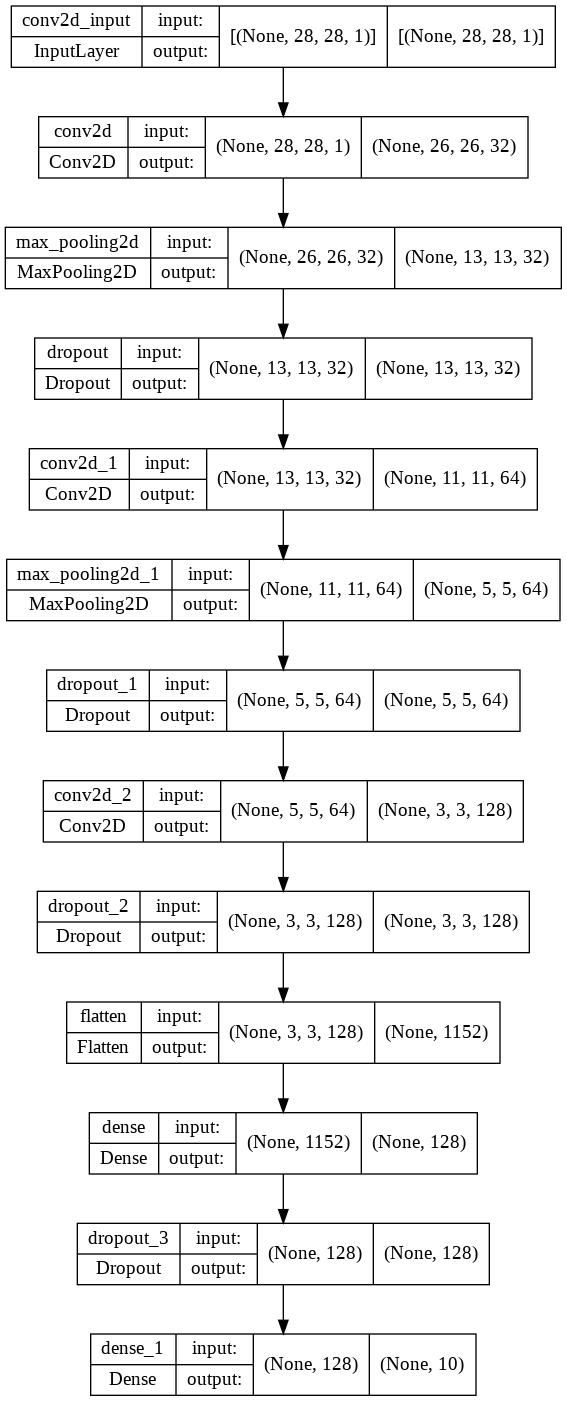

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs =50
train_model = model.fit(X_train_2, Y_train, batch_size=32, epochs=epochs, verbose=0, validation_data=(X_test, Y_test), callbacks=[callback])

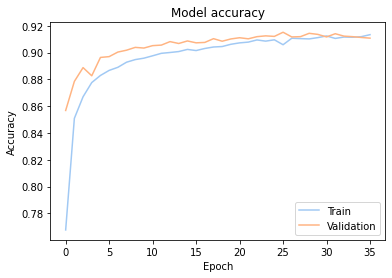

In [ ]:
# Plot training & validation accuracy

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

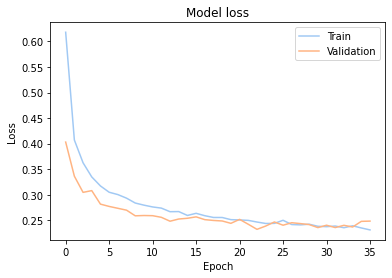

In [ ]:
# Plot training & validation loss values
plt.plot(train_model.history['loss'], label='Train')
plt.plot(train_model.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(X_test_2, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24042096734046936
Test accuracy: 0.9151999950408936


So, using the last model with Adam optimiser & adding dropout layers to the model we got the best results (`Test loss ~0.24` and `Test accuracy ~0.9152`). This means that we are going to continue with some predictios in order to see how the model works.



In [ ]:
# predicting lable for test_images
predictions=model.predict(X_test_2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (Y_test[0]))

1. Prediction array: [9.6414194e-17 4.8418456e-21 1.1394574e-15 2.8514076e-20 1.9697749e-15
 1.3197819e-06 8.9991110e-16 1.9832209e-05 8.7527345e-16 9.9997890e-01]
2. Label number having highest confidence in prediction array: 9
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# creating a funtion which will help to verify the prediction is true of not
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour
    
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  


#function to display bar chart showing whether image prediction is how much correct 
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

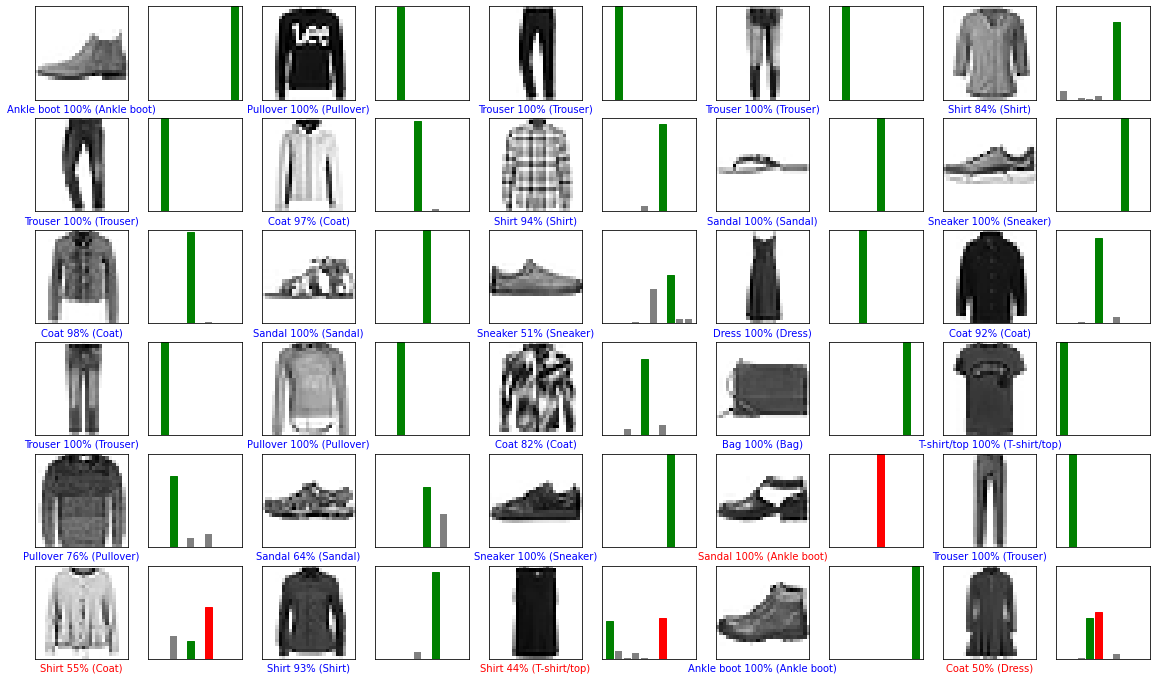

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions, Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, Y_test)
plt.show()